In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# Set seeds for reproducibility
random_seed = 4101  
random.seed(random_seed)
np.random.seed(random_seed)

weekly_df = pd.read_csv("../data/weekly_df.csv")
# Convert Date column to datetime
weekly_df['Date'] = pd.to_datetime(weekly_df['Date'])

# Drop rows where 'mvel1' is -inf
weekly_df = weekly_df[weekly_df['mvel1'] != -np.inf]

# Split the data into train and test sets
train_df = weekly_df[weekly_df['Date'] <= '2015-12-31']
test_df = weekly_df[weekly_df['Date'] > '2015-12-31']

# OLS-3

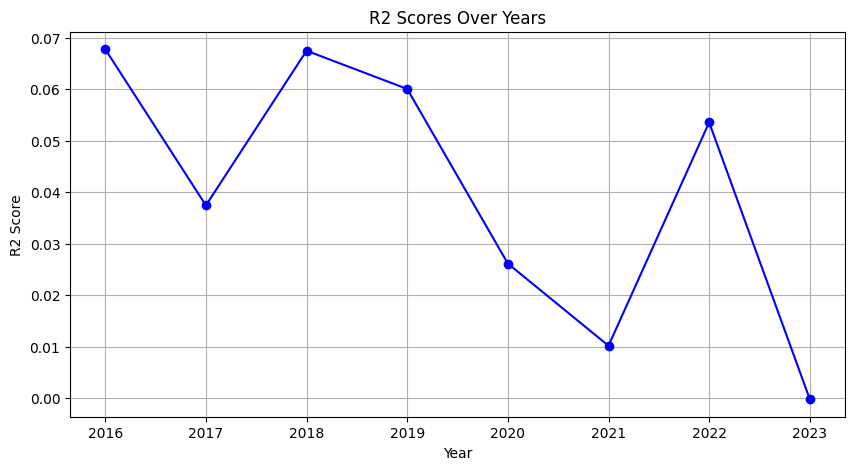

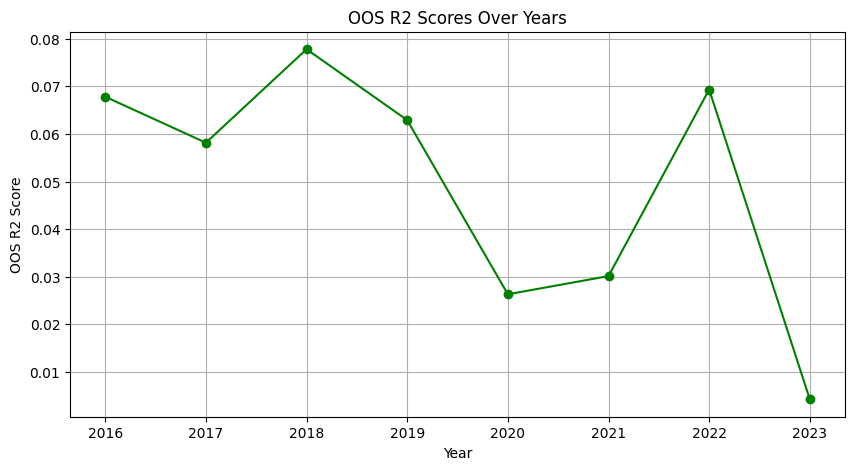

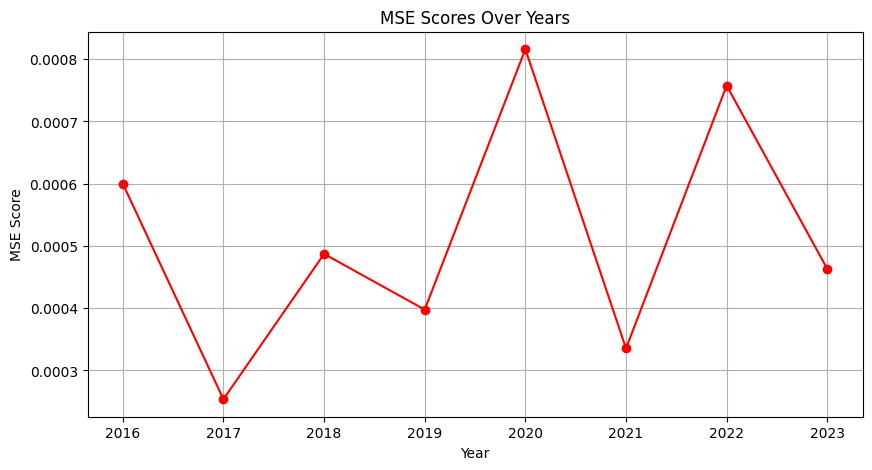

In [13]:
# Define the features and target variable
features = ['mvel1', 'bm', 'mom1m']
target = 'risk_premium'

# Initialize lists to store R2, OOS R2 and MSE values
r2_scores_ols3 = []
mse_scores_ols3 = []
r2_out_of_sample_scores_ols3 = []

# Initialize lists to store actual and predicted values
y_actual_all_ols3 = []
y_pred_all_ols3 = []

# Initialize the scaler
scaler = StandardScaler()

# Loop through each year from 2016 to 2023
for year in range(2016, 2024):
    # Define the training and testing data
    train_data = weekly_df[(weekly_df['Date'] >= f'{1990+year-2016}-01-01') & (weekly_df['Date'] < f'{year}-01-01')]
    test_data = weekly_df[(weekly_df['Date'] >= f'{year}-01-01') & (weekly_df['Date'] < f'{year+1}-01-01')]
    
    # Prepare the training and testing sets
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]
    
    # Standardize the features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Add a constant to the features (intercept)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Fit the OLS model
    model = sm.OLS(y_train, X_train).fit()
    
    # Make predictions
    predictions = model.predict(X_test)

    # Collect actual and predicted values
    y_actual_all_ols3.extend(y_test)
    y_pred_all_ols3.extend(predictions)
    
    # Calculate R2 and MSE
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    # Calculate out-of-sample R2
    y_train_mean = np.mean(y_train)
    ss_total = np.sum((y_test - y_train_mean) ** 2)
    ss_residual = np.sum((y_test - predictions) ** 2)
    r2_out_of_sample_ols3 = 1 - (ss_residual / ss_total)
    
    # Append the scores to the lists
    r2_scores_ols3.append(r2)
    mse_scores_ols3.append(mse)
    r2_out_of_sample_scores_ols3.append(r2_out_of_sample_ols3)

# Convert actual and predicted values to DataFrame
results_df_ols3 = pd.DataFrame({
    'Year': np.repeat(range(2016, 2024), [len(weekly_df[(weekly_df['Date'] >= f'{year}-01-01') & (weekly_df['Date'] < f'{year+1}-01-01')]) for year in range(2016, 2024)]),
    'y_actual': y_actual_all_ols3,
    'y_pred': y_pred_all_ols3
})

# Save the DataFrame to a CSV file
results_df_ols3.to_csv('dm_test_results_OLS3.csv', index=False)

# Plot R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_scores_ols3, marker='o', linestyle='-', color='b')
plt.title('R2 Scores Over Years')
plt.xlabel('Year')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

# Plot OOS R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_out_of_sample_scores_ols3, marker='o', linestyle='-', color='g')
plt.title('OOS R2 Scores Over Years')
plt.xlabel('Year')
plt.ylabel('OOS R2 Score')
plt.grid(True)
plt.show()

# Plot MSE values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), mse_scores_ols3, marker='o', linestyle='-', color='r')
plt.title('MSE Scores Over Years')
plt.xlabel('Year')
plt.ylabel('MSE Score')
plt.grid(True)
plt.show()

# OLS

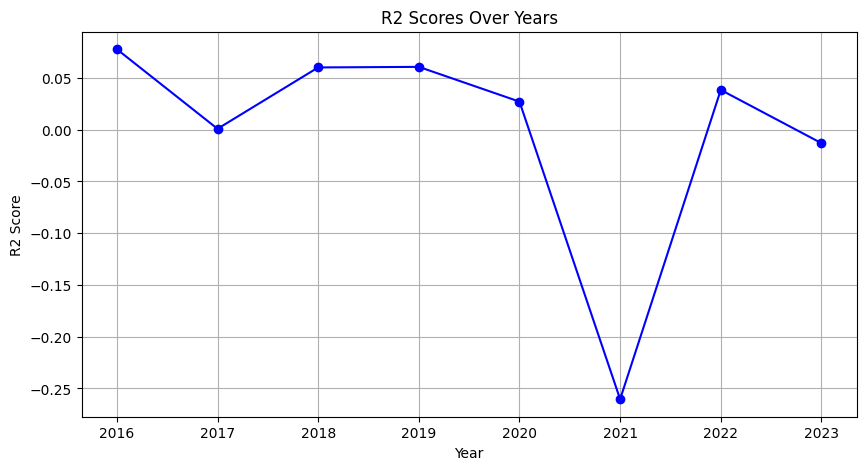

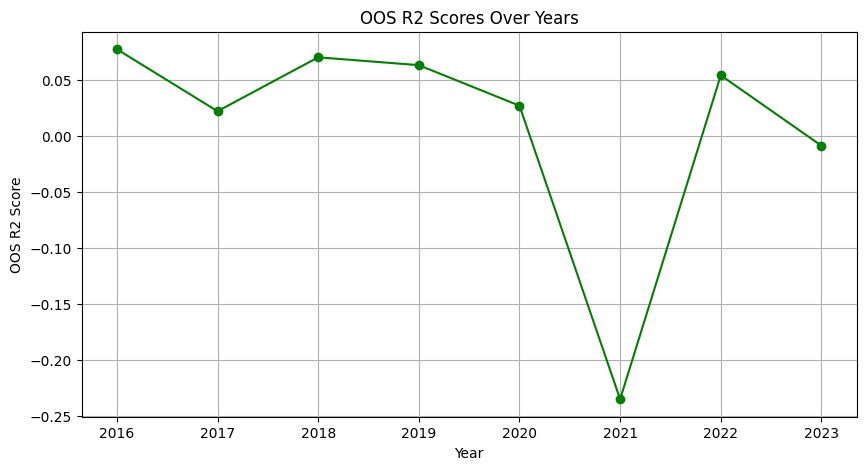

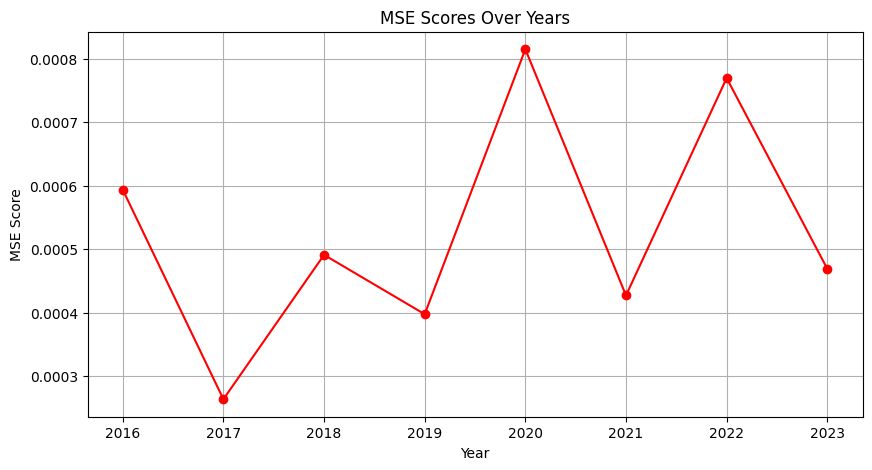

In [ ]:
# Define the features and target variable
features = weekly_df.columns.tolist()
features.remove('Date')
features.remove('risk_premium')
target = 'risk_premium'

# Initialize lists to store R2, OOS R2 and MSE values
r2_scores_ols = []
mse_scores_ols = []
r2_out_of_sample_scores_ols = []


# Initialize lists to store actual and predicted values
y_actual_all_ols = []
y_pred_all_ols = []

# Initialize the scaler
scaler = StandardScaler()

# Loop through each year from 2016 to 2023
for year in range(2016, 2024):
    # Define the training and testing data
    train_data = weekly_df[(weekly_df['Date'] >= f'{1990+year-2016}-01-01') & (weekly_df['Date'] < f'{year}-01-01')]
    test_data = weekly_df[(weekly_df['Date'] >= f'{year}-01-01') & (weekly_df['Date'] < f'{year+1}-01-01')]
    
    # Prepare the training and testing sets
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]
    
    # Standardize the features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Add a constant to the features (intercept)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test, has_constant='add')

    # Fit the OLS model
    model = sm.OLS(y_train, X_train).fit()
    
    # Make predictions
    predictions = model.predict(X_test)

    # Collect actual and predicted values
    y_actual_all_ols.extend(y_test)
    y_pred_all_ols.extend(predictions)
    
    # Calculate R2 and MSE
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    # Calculate out-of-sample R2
    y_train_mean = np.mean(y_train)
    ss_total = np.sum((y_test - y_train_mean) ** 2)
    ss_residual = np.sum((y_test - predictions) ** 2)
    r2_out_of_sample = 1 - (ss_residual / ss_total)
    
    # Append the scores to the lists
    r2_scores_ols.append(r2)
    mse_scores_ols.append(mse)
    r2_out_of_sample_scores_ols.append(r2_out_of_sample)

# # Convert actual and predicted values to DataFrame
results_df_ols = pd.DataFrame({
    'Year': np.repeat(range(2016, 2024), [len(weekly_df[(weekly_df['Date'] >= f'{year}-01-01') & (weekly_df['Date'] < f'{year+1}-01-01')]) for year in range(2016, 2024)]),
    'y_actual': y_actual_all_ols,
    'y_pred': y_pred_all_ols
})

# Save the DataFrame to a CSV file
results_df_ols.to_csv('dm_test_results_OLS.csv', index=False)

# Plot R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_scores_ols, marker='o', linestyle='-', color='b')
plt.title('R2 Scores Over Years')
plt.xlabel('Year')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

# Plot OOS R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_out_of_sample_scores_ols, marker='o', linestyle='-', color='g')
plt.title('OOS R2 Scores Over Years')
plt.xlabel('Year')
plt.ylabel('OOS R2 Score')
plt.grid(True)
plt.show()

# Plot MSE values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), mse_scores_ols, marker='o', linestyle='-', color='r')
plt.title('MSE Scores Over Years')
plt.xlabel('Year')
plt.ylabel('MSE Score')
plt.grid(True)
# Show the plots
plt.show()

# Ridge

Best alpha for year 2016: 5500.0
Best alpha for year 2017: 5000.0
Best alpha for year 2018: 6000.0
Best alpha for year 2019: 5500.0
Best alpha for year 2020: 7000.0
Best alpha for year 2021: 6000.0
Best alpha for year 2022: 6000.0
Best alpha for year 2023: 6000.0


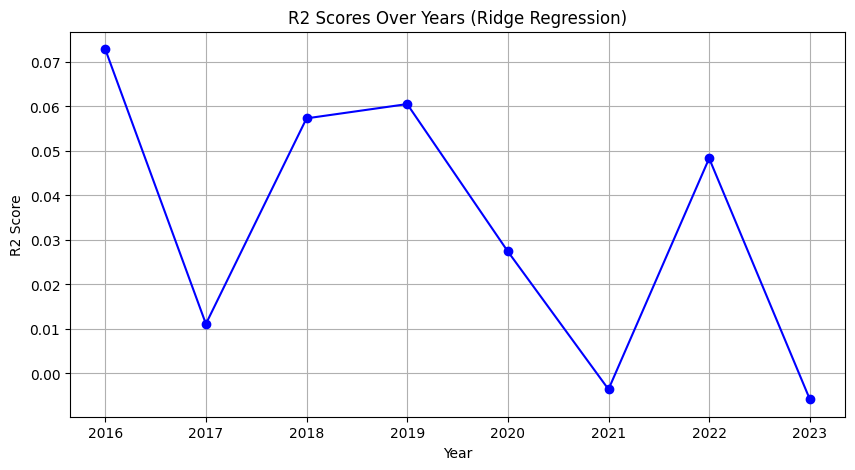

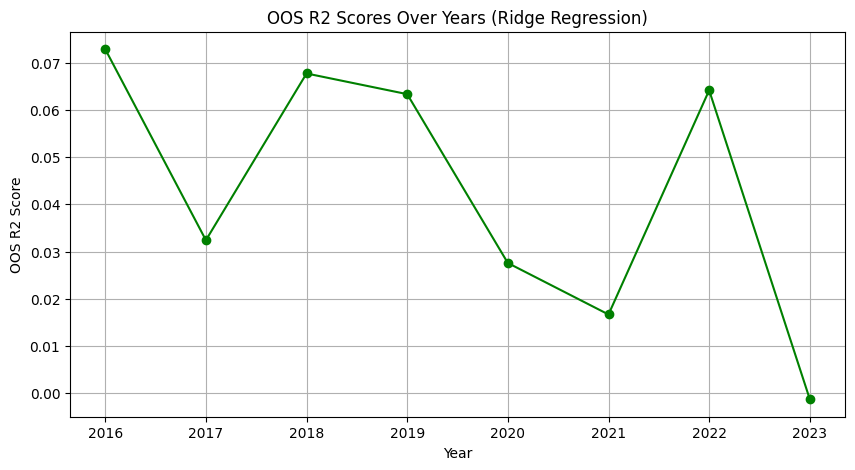

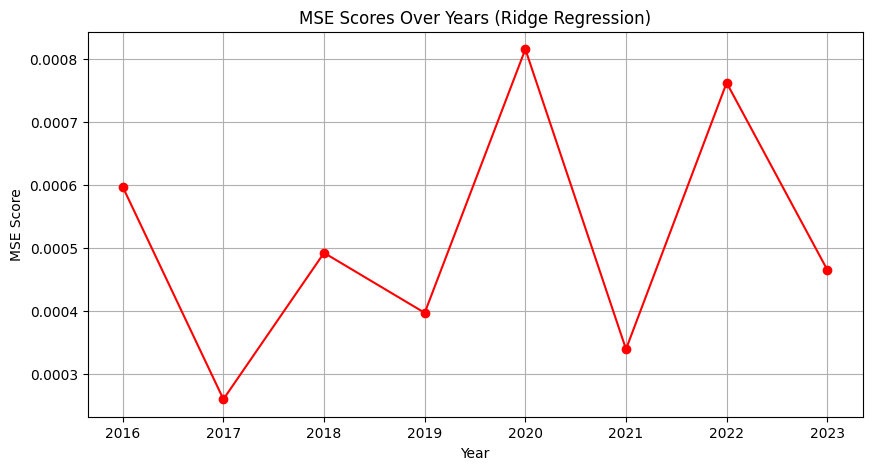

In [4]:
# Define the features and target variable
features = weekly_df.columns.tolist()
features.remove('Date')
features.remove('risk_premium')
target = 'risk_premium'

# Initialize lists to store R2, OOS R2 and MSE values
r2_scores_ridge = []
mse_scores_ridge = []
r2_out_of_sample_scores_ridge = []

# Initialize the scaler
scaler = StandardScaler()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [100.0, 1000.0, 3000.0, 5000.0, 5500.0, 6000.0, 7000.0, 7500.0]}

# Loop through each year from 2016 to 2023
for year in range(2016, 2024):
    # Define the training and testing data
    train_data = weekly_df[(weekly_df['Date'] >= f'{1990+year-2016}-01-01') & (weekly_df['Date'] < f'{year}-01-01')]
    test_data = weekly_df[(weekly_df['Date'] >= f'{year}-01-01') & (weekly_df['Date'] < f'{year+1}-01-01')]
    
    # Prepare the training and testing sets
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]
    
    # Standardize the features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize and fit the Ridge model using GridSearchCV
    grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_ridge_model = grid_search.best_estimator_
    print(f'Best alpha for year {year}: {best_ridge_model.alpha}')
    
    # Make predictions
    predictions = best_ridge_model.predict(X_test)
    
    # Calculate R2 and MSE
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    # Calculate out-of-sample R2
    y_train_mean = np.mean(y_train)
    ss_total = np.sum((y_test - y_train_mean) ** 2)
    ss_residual = np.sum((y_test - predictions) ** 2)
    r2_out_of_sample = 1 - (ss_residual / ss_total)
    
    # Append the scores to the lists
    r2_scores_ridge.append(r2)
    mse_scores_ridge.append(mse)
    r2_out_of_sample_scores_ridge.append(r2_out_of_sample)

# Plot R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_scores_ridge, marker='o', linestyle='-', color='b')
plt.title('R2 Scores Over Years (Ridge Regression)')
plt.xlabel('Year')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

# Plot OOS R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_out_of_sample_scores_ridge, marker='o', linestyle='-', color='g')
plt.title('OOS R2 Scores Over Years (Ridge Regression)')
plt.xlabel('Year')
plt.ylabel('OOS R2 Score')
plt.grid(True)
plt.show()

# Plot MSE values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), mse_scores_ridge, marker='o', linestyle='-', color='r')
plt.title('MSE Scores Over Years (Ridge Regression)')
plt.xlabel('Year')
plt.ylabel('MSE Score')
plt.grid(True)
plt.show()

# Lasso

Best alpha for year 2016: 0.0001
Best alpha for year 2017: 0.0001
Best alpha for year 2018: 0.0001
Best alpha for year 2019: 0.0001
Best alpha for year 2020: 0.0001
Best alpha for year 2021: 0.0001
Best alpha for year 2022: 0.0001
Best alpha for year 2023: 0.0001


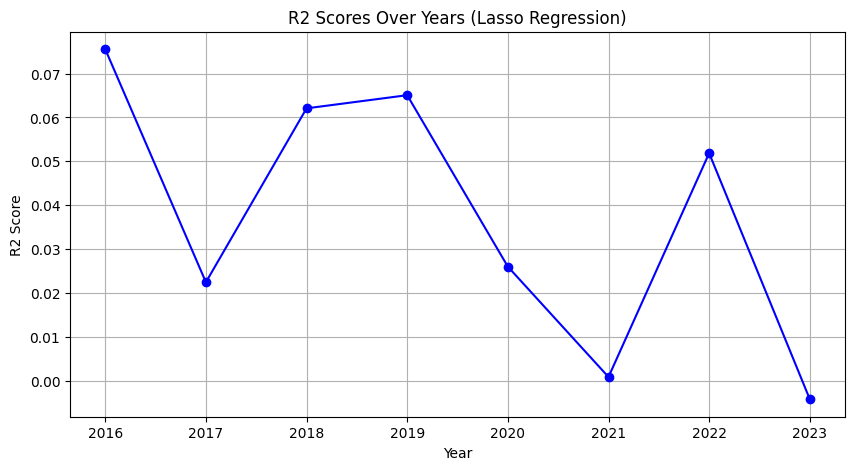

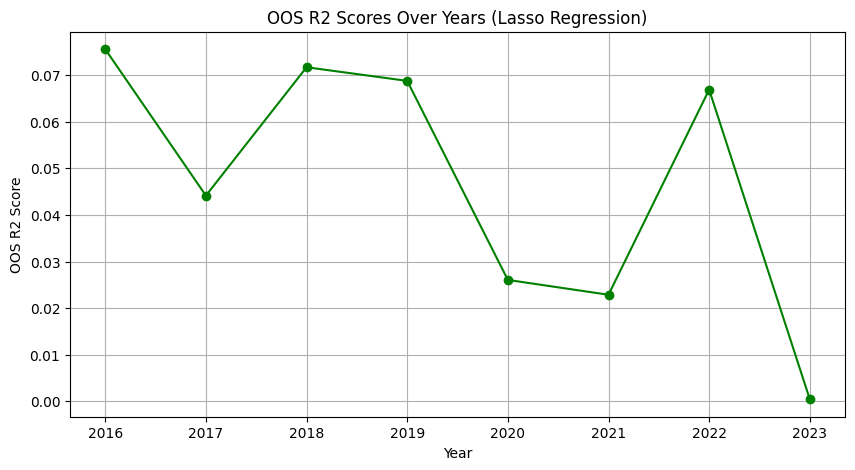

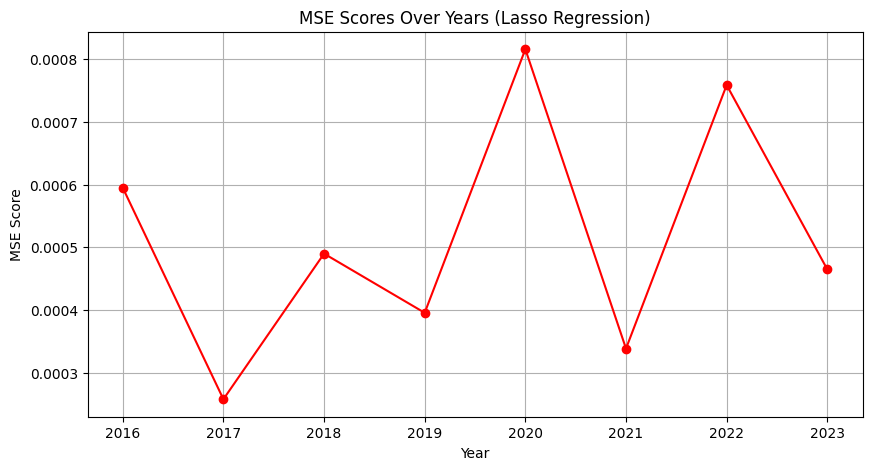

In [5]:
# Define the features and target variable
features = weekly_df.columns.tolist()
features.remove('Date')
features.remove('risk_premium')
target = 'risk_premium'

# Initialize lists to store R2, OOS R2 and MSE values
r2_scores_lasso = []
mse_scores_lasso = []
r2_out_of_sample_scores_lasso = []

# Initialize the scaler
scaler = StandardScaler()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.0001 ,0.001, 0.01, 0.1]}

# Loop through each year from 2016 to 2023
for year in range(2016, 2024):
    # Define the training and testing data
    train_data = weekly_df[weekly_df['Date'] < f'{year}-01-01']
    test_data = weekly_df[(weekly_df['Date'] >= f'{year}-01-01') & (weekly_df['Date'] < f'{year+1}-01-01')]
    
    # Prepare the training and testing sets
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]
    
    # Standardize the features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize and fit the Lasso model using GridSearchCV
    grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_lasso_model = grid_search.best_estimator_
    print(f'Best alpha for year {year}: {best_lasso_model.alpha}')
    
    # Make predictions
    predictions = best_lasso_model.predict(X_test)
    
    # Calculate R2 and MSE
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    # Calculate out-of-sample R2
    y_train_mean = np.mean(y_train)
    ss_total = np.sum((y_test - y_train_mean) ** 2)
    ss_residual = np.sum((y_test - predictions) ** 2)
    r2_out_of_sample = 1 - (ss_residual / ss_total)
    
    # Append the scores to the lists
    r2_scores_lasso.append(r2)
    mse_scores_lasso.append(mse)
    r2_out_of_sample_scores_lasso.append(r2_out_of_sample)

# Plot R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_scores_lasso, marker='o', linestyle='-', color='b')
plt.title('R2 Scores Over Years (Lasso Regression)')
plt.xlabel('Year')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

# Plot OOS R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_out_of_sample_scores_lasso, marker='o', linestyle='-', color='g')
plt.title('OOS R2 Scores Over Years (Lasso Regression)')
plt.xlabel('Year')
plt.ylabel('OOS R2 Score')
plt.grid(True)
plt.show()

# Plot MSE values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), mse_scores_lasso, marker='o', linestyle='-', color='r')
plt.title('MSE Scores Over Years (Lasso Regression)')
plt.xlabel('Year')
plt.ylabel('MSE Score')
plt.grid(True)
plt.show()

# Elastic Net

Best alpha for year 2016: 0.001
Best l1_ratio for year 2016: 0.3
Best alpha for year 2017: 0.001
Best l1_ratio for year 2017: 0.3
Best alpha for year 2018: 0.001
Best l1_ratio for year 2018: 0.1
Best alpha for year 2019: 0.001
Best l1_ratio for year 2019: 0.1
Best alpha for year 2020: 0.001
Best l1_ratio for year 2020: 0.1
Best alpha for year 2021: 0.001
Best l1_ratio for year 2021: 0.1
Best alpha for year 2022: 0.001
Best l1_ratio for year 2022: 0.1
Best alpha for year 2023: 0.001
Best l1_ratio for year 2023: 0.1


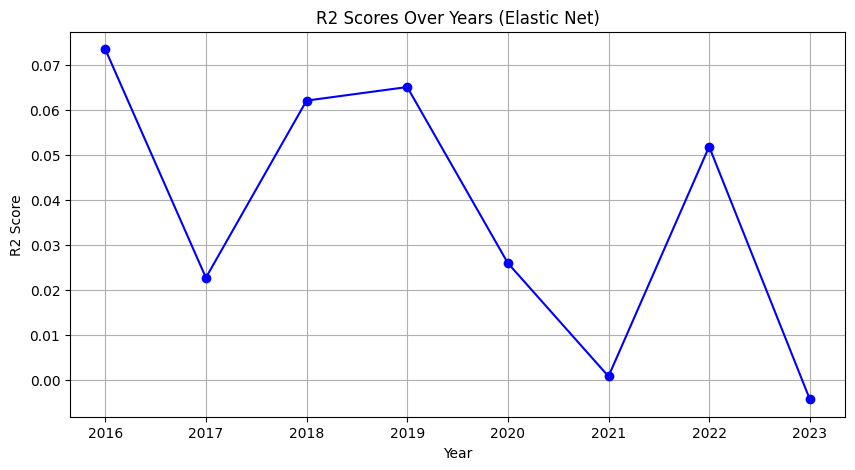

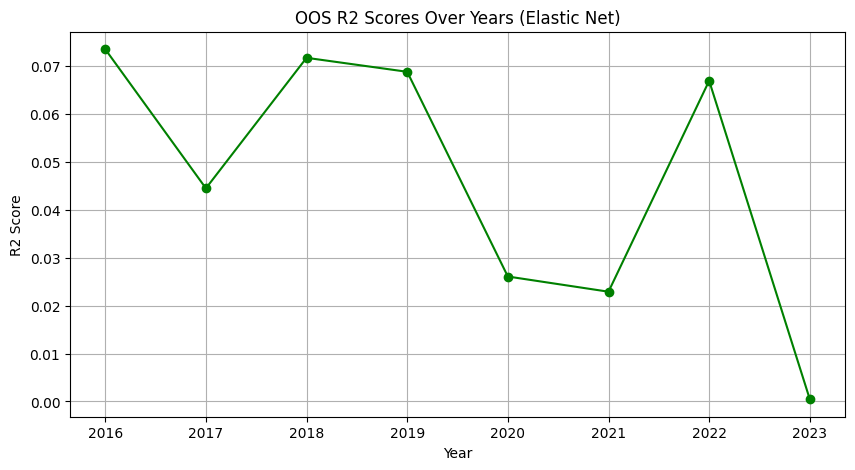

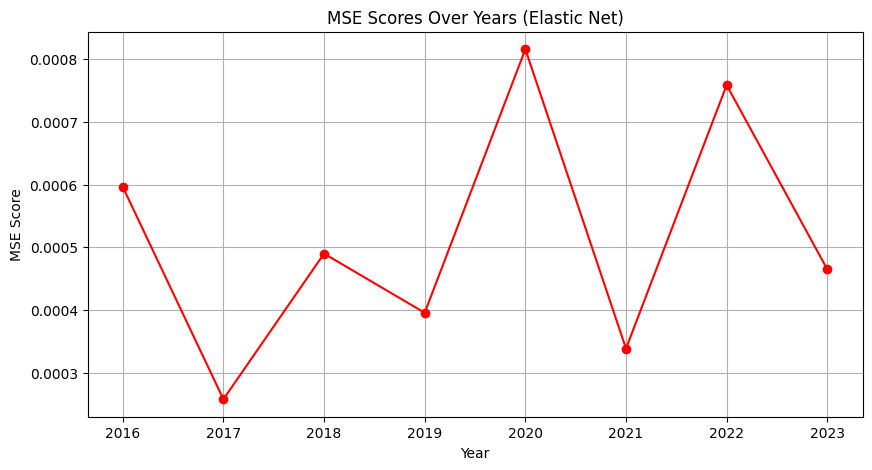

In [11]:
# Define the features and target variable
features = weekly_df.columns.tolist()
features.remove('Date')
features.remove('risk_premium')
target = 'risk_premium'

# Initialize lists to store R2 and MSE values
r2_scores_enet = []
mse_scores_enet = []
r2_out_of_sample_scores_enet = []

# Initialize the scaler
scaler = StandardScaler()

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.001, 0.01, 0.1],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Loop through each year from 2016 to 2023
for year in range(2016, 2024):
    # Define the training and testing data
    train_data = weekly_df[weekly_df['Date'] < f'{year}-01-01']
    test_data = weekly_df[(weekly_df['Date'] >= f'{year}-01-01') & (weekly_df['Date'] < f'{year+1}-01-01')]
    
    # Prepare the training and testing sets
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]
    
    # Standardize the features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize and fit the ElasticNet model using GridSearchCV
    grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f'Best alpha for year {year}: {best_model.alpha}')
    print(f'Best l1_ratio for year {year}: {best_model.l1_ratio}')
    
    # Make predictions
    predictions = best_model.predict(X_test)
    
    # Calculate R2 and MSE
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    # Calculate out-of-sample R2
    y_train_mean = np.mean(y_train)
    ss_total = np.sum((y_test - y_train_mean) ** 2)
    ss_residual = np.sum((y_test - predictions) ** 2)
    r2_out_of_sample = 1 - (ss_residual / ss_total)
    
    # Append the scores to the lists
    r2_scores_enet.append(r2)
    mse_scores_enet.append(mse)
    r2_out_of_sample_scores_enet.append(r2_out_of_sample)

# Plot R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_scores_enet, marker='o', linestyle='-', color='b')
plt.title('R2 Scores Over Years (Elastic Net)')
plt.xlabel('Year')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

# Plot OOS R2 values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), r2_out_of_sample_scores_enet, marker='o', linestyle='-', color='g')
plt.title('OOS R2 Scores Over Years (Elastic Net)')
plt.xlabel('Year')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

# Plot MSE values
plt.figure(figsize=(10, 5))
plt.plot(range(2016, 2024), mse_scores_enet, marker='o', linestyle='-', color='r')
plt.title('MSE Scores Over Years (Elastic Net)')
plt.xlabel('Year')
plt.ylabel('MSE Score')
plt.grid(True)
plt.show()

# Overall

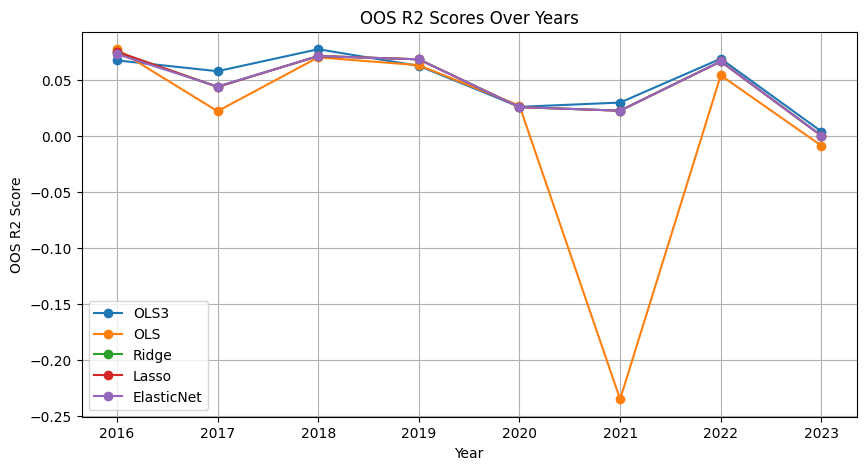

In [12]:
# Combine all R2 scores into a DataFrame
r2_scores_df = pd.DataFrame({
    'Year': range(2016, 2024),
    'OLS3': r2_out_of_sample_scores_ols3,
    'OLS': r2_out_of_sample_scores_ols,
    'Ridge': r2_out_of_sample_scores_lasso,
    'Lasso': r2_out_of_sample_scores_lasso,
    'ElasticNet': r2_out_of_sample_scores_enet
})

# Plot all R2 scores on one graph
plt.figure(figsize=(10, 5))
plt.plot(r2_scores_df['Year'], r2_scores_df['OLS3'], marker='o', linestyle='-', label='OLS3')
plt.plot(r2_scores_df['Year'], r2_scores_df['OLS'], marker='o', linestyle='-', label='OLS')
plt.plot(r2_scores_df['Year'], r2_scores_df['Ridge'], marker='o', linestyle='-', label='Ridge')
plt.plot(r2_scores_df['Year'], r2_scores_df['Lasso'], marker='o', linestyle='-', label='Lasso')
plt.plot(r2_scores_df['Year'], r2_scores_df['ElasticNet'], marker='o', linestyle='-', label='ElasticNet')
plt.title('OOS R2 Scores Over Years')
plt.xlabel('Year')
plt.ylabel('OOS R2 Score')
plt.legend()
plt.grid(True)
plt.show()

# Save the DataFrame to a CSV file
r2_scores_df.to_csv('r2_scores_linear.csv', index=False)